# Perusahaan Film Junky Union

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Load data dan mendapatkan gambaran umum](#datarev_1)
    * [1.2 Memeriksa tipe data](#datarev_2)
    * [1.3 Memeriksa nilai yang hilang](#datarev_3)
    * [1.4 Memeriksa nilai yang terduplikasi](#datarev_4)
    * [1.5 Kesimpulan](#datarev_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Distribusi Data](#analysis_1)
    * [3.2 Prosedur Evaluasi](#analysis_2)
    * [3.3 Normalisasi](#analysis_3)
    * [3.4 Train Test Split](#analysis_4)

* [Tahap 4. Pengujian](#test)
    * [4.1 Bekerja dengan model](#test_1)
    * [4.1.1 Model 0 - Constant](#test_1_1)
    * [4.1.2 Model 1 - NLTK, TF-IDF dan LR](#test_1_2)
    * [4.1.3 Model 3 - spaCy, TF-IDF and LR](#test_1_3)
    * [4.1.4 Model 4 - spaCy, TF-IDF and LGBMClassifier](#test_1_4)
    * [4.2 Melakukan pengujian model-model pada my reviews](#test_2)
    * [4.2.1 Model 1](#test_2_1)
    * [4.2.2 Model 2](#test_2_2)
    * [4.2.3 Model 3](#test_2_3)
    * [4.2.4 Model 4](#test_2_4)        

* [Temuan](#end)

[Kembali ke Daftar Isi](#back)

# Pendahuluan <a id='intro'></a>

Junky Union Film, sebuah komunitas baru bagi penggemar film klasik sedang mengembangkan sistem untuk memfilter dan mengategorikan ulasan film. Misi utamanya adalah melatih model agar bisa mendeteksi ulasan negatif secara otomatis. Kamu akan menggunakan dataset ulasan film IMBD dengan pelabelan polaritas untuk membuat sebuah model yang bisa mengklasifikasikan ulasan positif dan negatif. Model ini setidaknya harus memiliki skor F1 sebesar 0,85.

Instruksi Proyek
- Muat datanya.
- Lakukan pra-pemrosesan data apabila memang diperlukan.
- Lakukan EDA dan buat kesimpulan terkait ketidakseimbangan kelas.
- Lakukan pra-pemrosesan data untuk membuat model.
- Latih setidaknya tiga model untuk train dataset yang ada.
- Uji model untuk test dataset yang ada.
- Tulis beberapa ulasanmu sendiri dan klasifikasikan dengan semua model.
- Periksa perbedaan antara hasil pengujian model dari dua poin di atas. Coba untuk menjelaskan hasilnya.
- Tampilkan hasil penemuanmu.


### Tujuan: 
Tugas utama dalam hal ini adalah membuat dan mengevaluasi model secara mandiri.


### Tahapan:
Peneliti memiliki data yang disimpan dalam *file*:
- /datasets/imdb_reviews.tsv

Data ini diperoleh dari Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, dan Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).
Berikut adalah deskripsi untuk kolom yang dipilih:
- review: teks ulasan
- pos: target, '0' untuk negatif dan '1' untuk positif
- ds_part: 'train'/'test' untuk bagian train/test dari dataset

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis
 4. Pengujian

[Kembali ke Daftar Isi](#back)

# Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan. Untuk beberapa libraries yang tidak bisa diimpor sebelumnya telah dilakukan instalasi.

In [1]:
import math

import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm
lemmatizer = WordNetLemmatizer()

In [2]:
# set matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# baris berikutnya menyediakan grafik dengan kualitas yang lebih baik di layar HiDPI 
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [4]:
# ini untuk menggunakan progress_apply, baca lebih lanjut di https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load data dan mendapatkan gambaran umum <a name='datarev_1'></a>

**Step 1.2**
Melakukan load data yang diperlukan dari file *taxi.csv* dan menyimpan ke
dalam dataframe df_reviews

In [5]:
try:
    df_reviews = pd.read_csv('imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
except:
    df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
#membaca file dan konversi ke dataframe df_reviews
    
df_reviews.shape
#melihat ukuran dataframe df_reviews

(47331, 17)

In [6]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

## Memeriksa tipe data <a name='datarev_2'></a>

**Step 1.3**
Melihat tipe data seluruh kolom dalam dataframe df_reviews untuk memeriksa kesuaian tipe data dengan isi data

In [8]:
df_reviews.dtypes

tconst              object
title_type          object
primary_title       object
original_title      object
start_year           int64
end_year            object
runtime_minutes     object
is_adult             int64
genres              object
average_rating     float64
votes                Int64
review              object
rating               int64
sp                  object
pos                  int64
ds_part             object
idx                  int64
dtype: object

## Memeriksa nilai yang hilang <a name='datarev_3'></a>

**Step 1.4**
Melakukan pemeriksaan missing value pada dataframe df_reviews

In [9]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

Kolom 'average rating' dan kolom 'votes' masing-masing memiliki 2 baris yang berisi missing values. Dengan pertimbangan jumlah missing values yang tidak signifikan untuk selanjutnya dapat dihapus.

## Memeriksa nilai yang terduplikasi <a name='datarev_4'></a>

**Step 1.5**
Melakukan pemeriksaan duplicated value pada dataframe df_reviews

In [10]:
df_reviews.duplicated().sum()

0

Tidak terdapat duplicated value.

## Kesimpulan <a name="datarev_conclusion"></a>

- Data terdiri dari 47331 baris dan 17 kolom
- Tipe data kolom untuk proses selanjutnya tidak ada yang perlu diubah 
- Terdapat nilai yang hilang pada 2 kolom masing-masing 2 buah (tidak signifikan)
- Tidak ada nilai yang terduplikasi

[Kembali ke Daftar Isi](#back)

# Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

**Step 2.1**
Menangani missing values. Dengan pertimbangan jumlah missing values yang tidak signifikan, hanya terdapat pada kolom 'average rating' dan kolom 'votes' masing-masing memiliki 2 baris yang berisi missing values, untuk selanjutnya kita dapat melakukan baris yang berisi missing values tersebut.

In [11]:
df_reviews = df_reviews.dropna()
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     0
votes              0
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

Tidak terdapat lagi missing value pada datafram df_reviews.

**Step 2.2**
Memeriksa keseimbangan class pada target (kolom 'pos') dan menampilkannya dalam histogram.

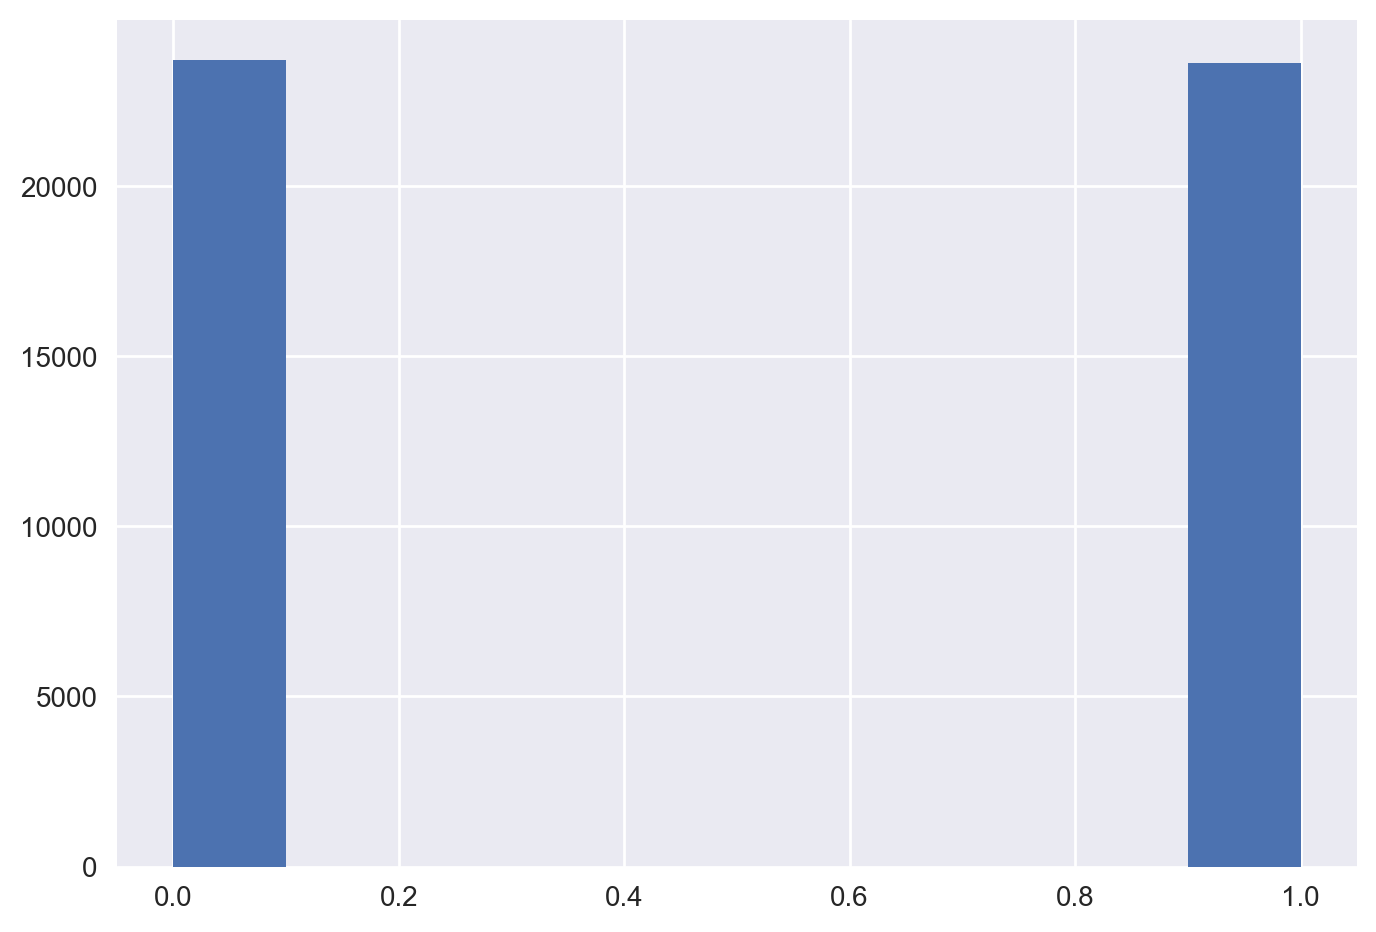

In [12]:
df_reviews['pos'].hist()
plt.show()

Dapat terlihat dari tampilan di atas bahwa class (0 dan 1) terlihat seimbang.

## Kesimpulan <a name="dataprep_conclusion"></a>

- Missing value telah ditindaklanjuti.
- Class (0 dan 1) pada target (kolom 'pos') telah seimbang.

[Kembali ke Daftar Isi](#back)

# Tahap 3. Analisis <a name='analysis'></a>

## Distribusi Data <a name='analysis_1'></a>

**Step 3.1**
Melakukan pemeriksaan Data Tahunan Jumlah Film dan Data Tahunan Jumlah Review

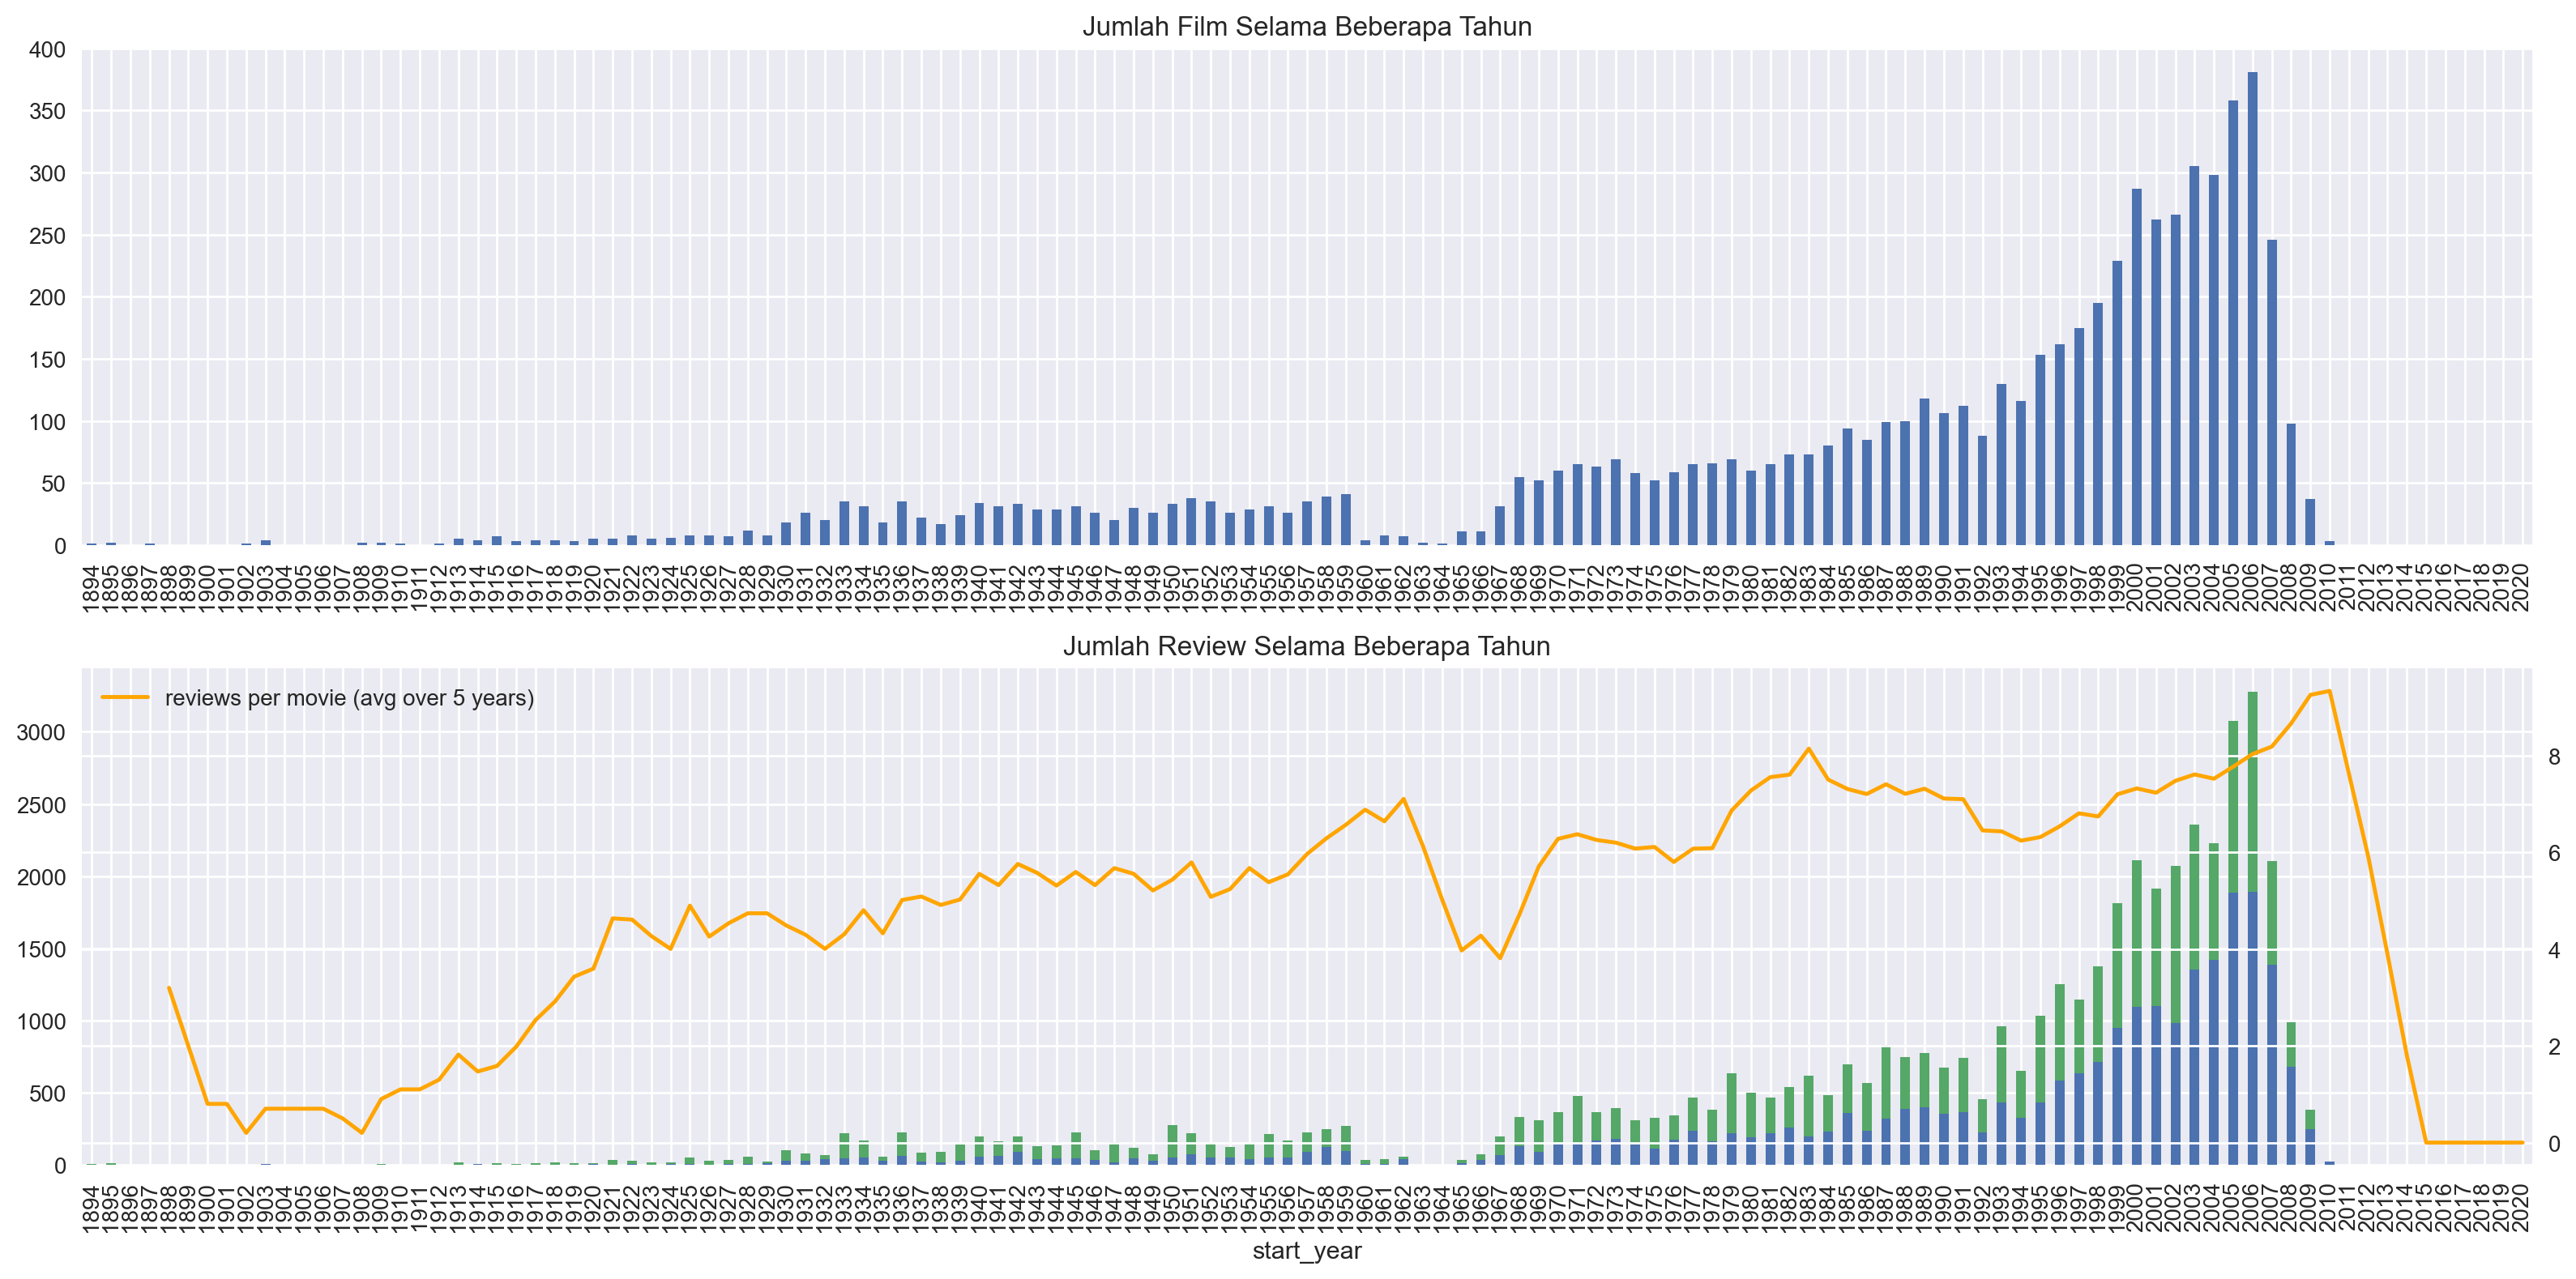

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Film Selama Beberapa Tahun')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Jumlah Review Selama Beberapa Tahun')

fig.tight_layout()

Kita dapat menemukan bahwa peningkatan jumlah film memuncak di 2006 kemudian menurun setelahnya, senada dengan jumlah review per film.

**Step 3.2**
Melakukan pemeriksaan distribusi jumlah review per film dengan exact counting dan KDE (untuk mengetahui seberapa jauh perbedaannya dengan exact counting)

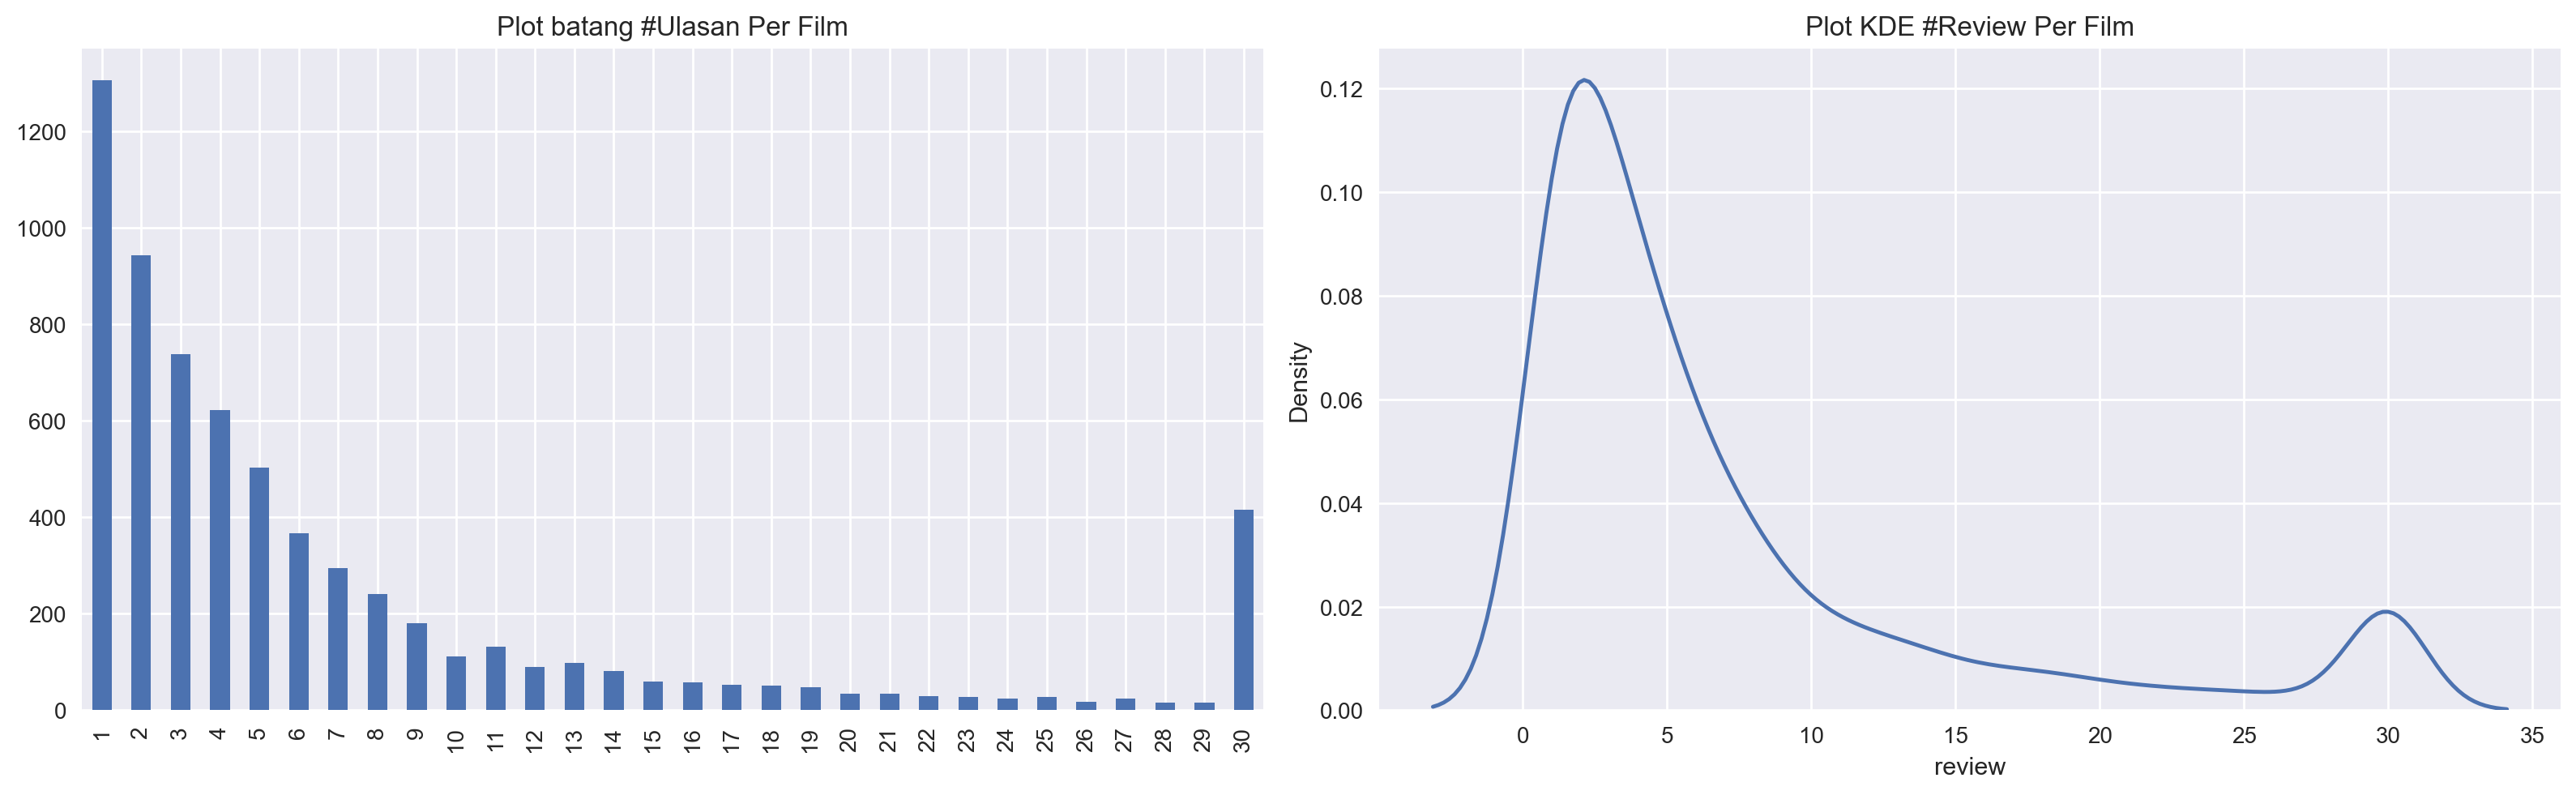

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Plot batang #Ulasan Per Film')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Plot KDE #Review Per Film')

fig.tight_layout()

Terdapat banyak film dengan 1 review dan terlihat penurunan konstan review per film seiring dengan bertambahnya jumlah review hingga tiba-tiba melonjak pada 30 review. Untuk selanjutnya kita lihat distribusi ratings, baik pada set train maupun set test.

**Step 3.3**
Melakukan pemeriksaan distribusi rating baik pada set train maupun set test.

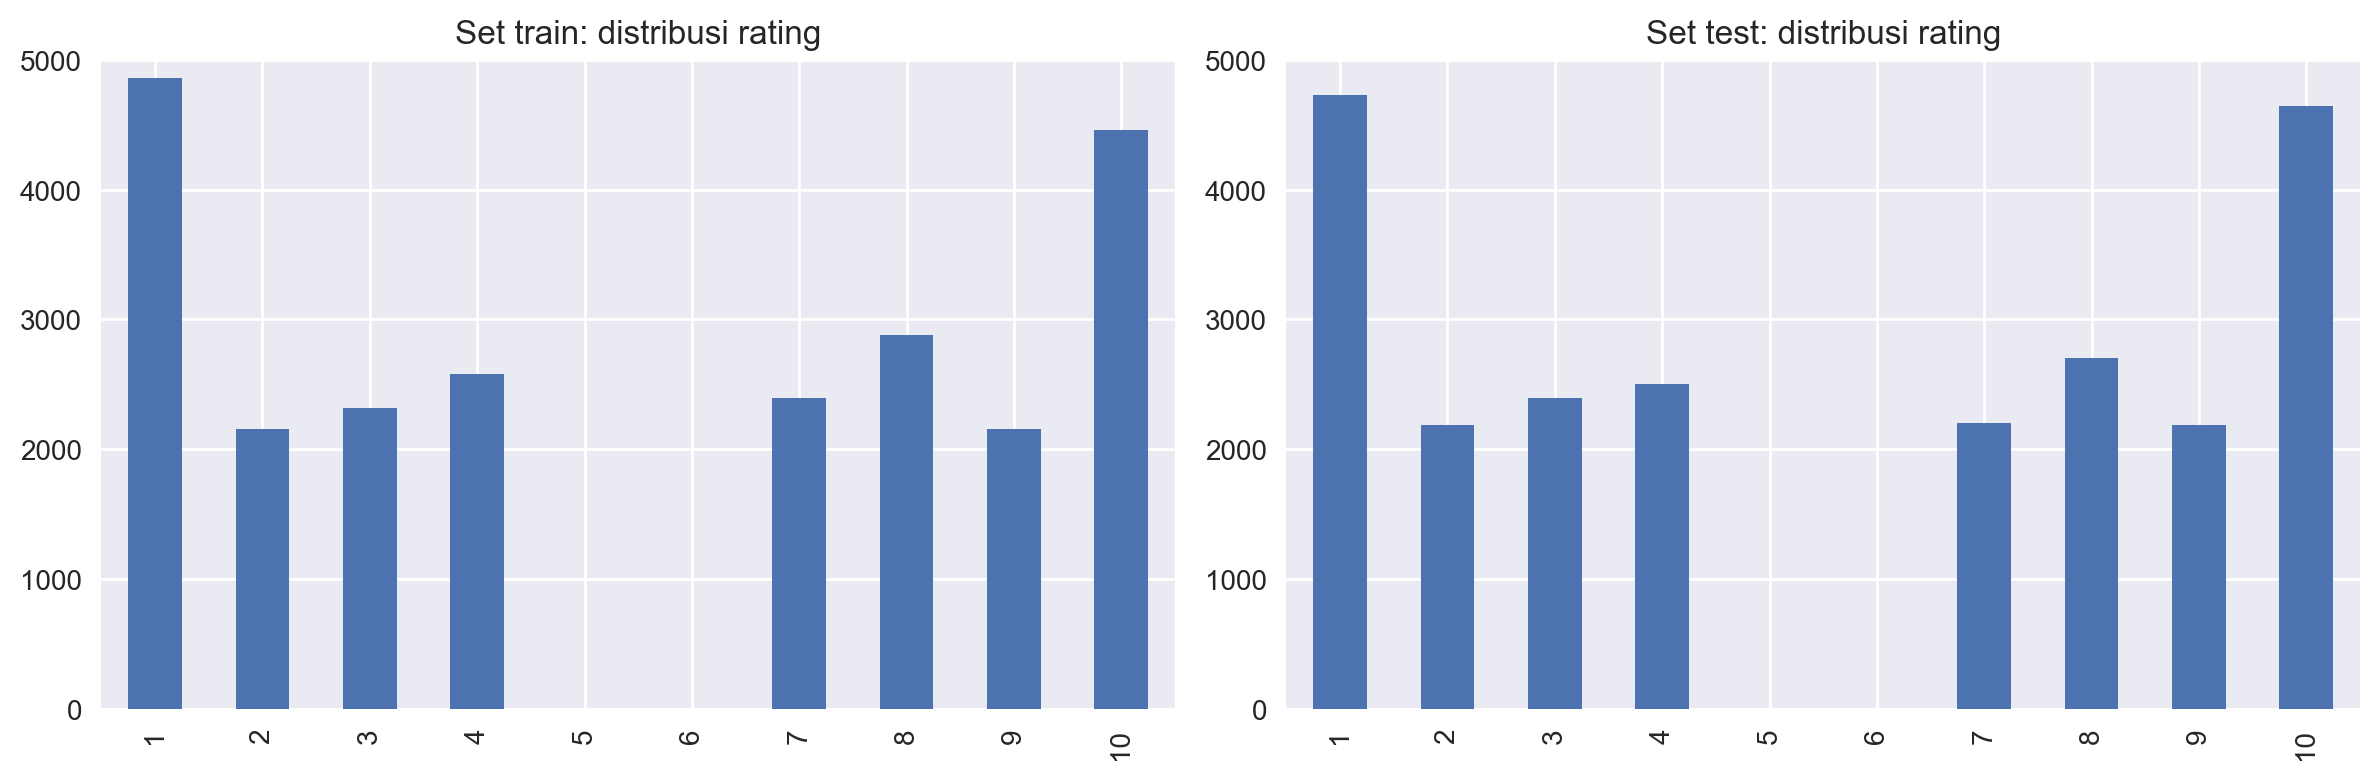

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Set train: distribusi rating')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Set test: distribusi rating')

fig.tight_layout()

Terdapat banyak review yang memberikan rating 1, diikuti dengan mereka yang memberikan rating 10. Tidak terdapat banyak perbedaan antara jumlah review yang memberikan rating 2, 3, 4 dan yang memberikan 7, 8, 9. Di sisi yang lain untuk rating 5 atau 6 jarang ada yang memberikan.

**Step 3.4**
Melakukan pemeriksaan distribusi review positif dan negatif dari tahun ke tahun baik untuk set train maupun set test.

Distribution of negative and positive reviews over the years for two parts of the dataset

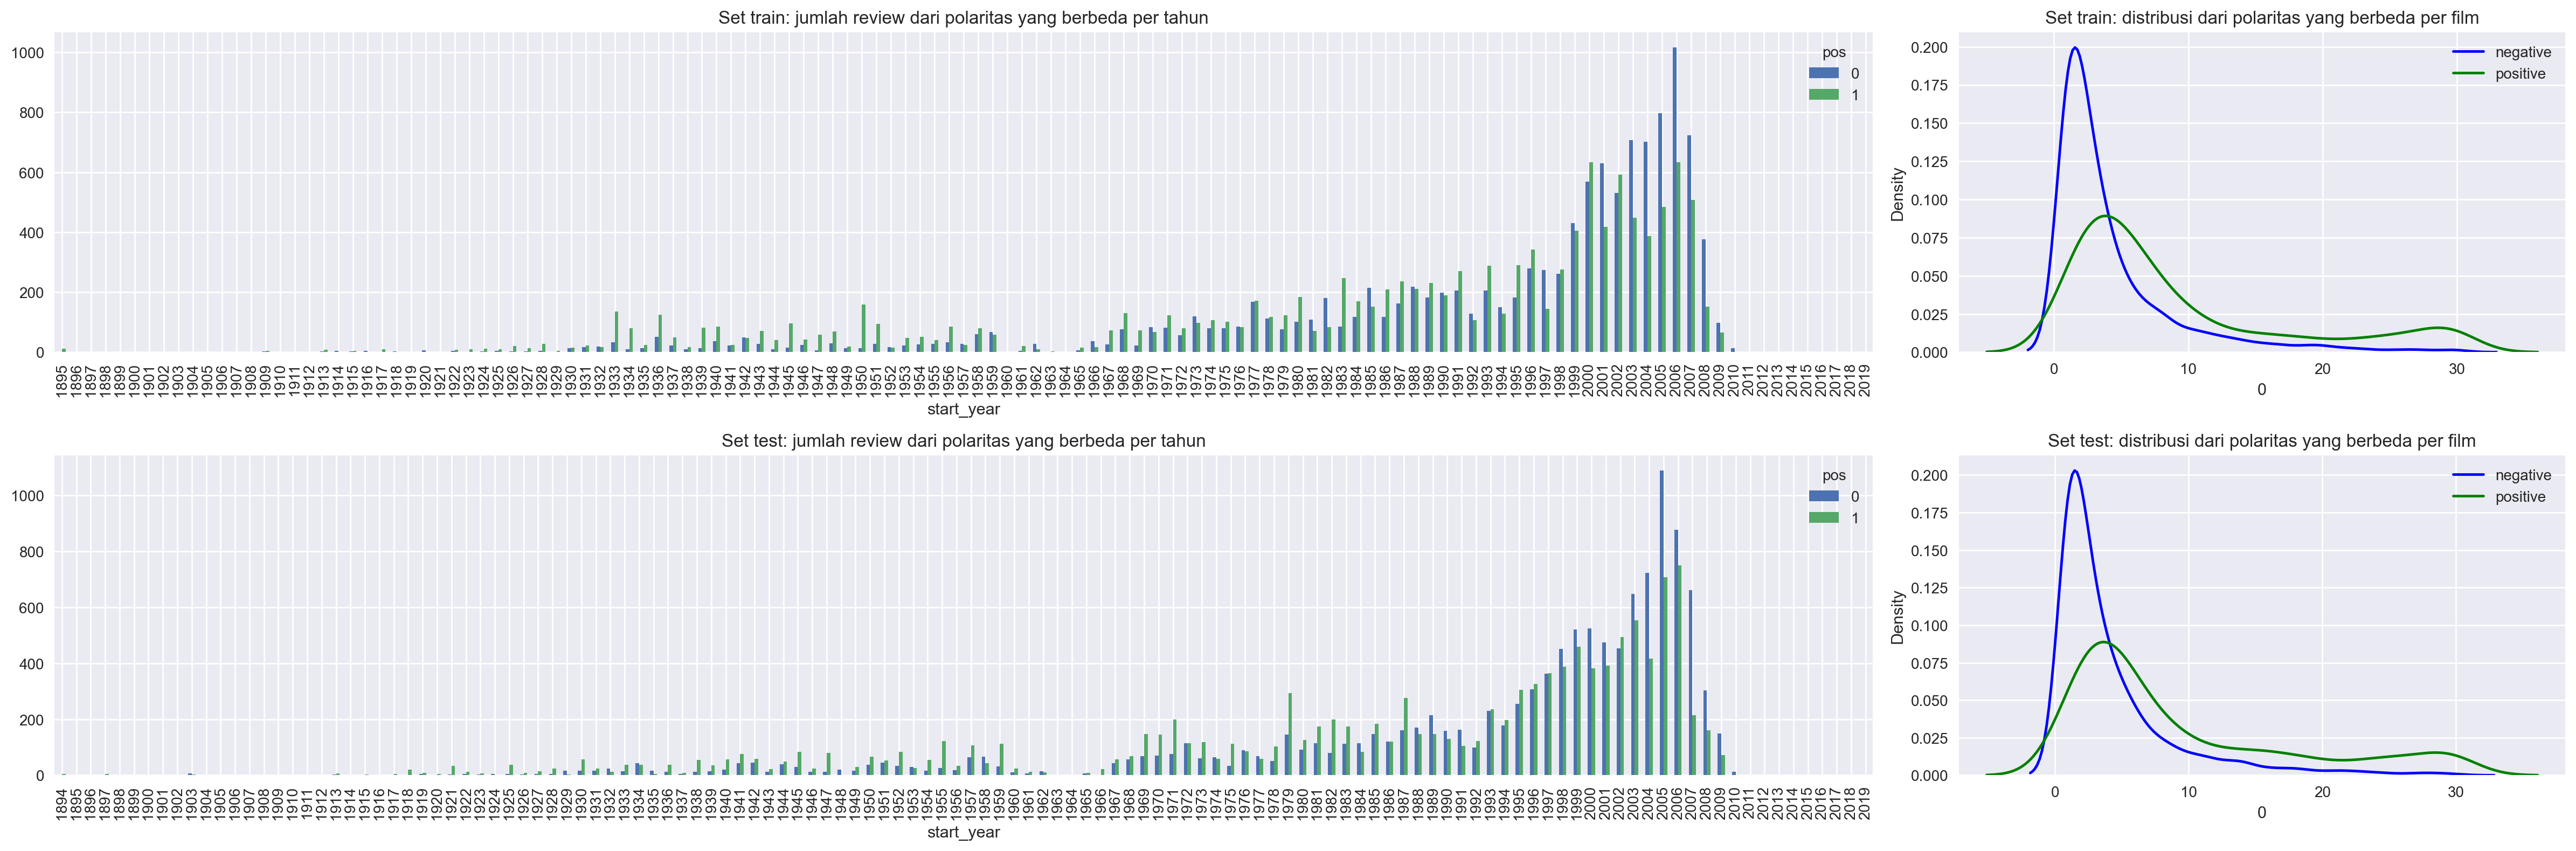

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(24, 8), gridspec_kw=dict(width_ratios=(3, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=False, ax=ax)
ax.set_title('Set train: jumlah review dari polaritas yang berbeda per tahun')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Set train: distribusi dari polaritas yang berbeda per film')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=False, ax=ax)
ax.set_title('Set test: jumlah review dari polaritas yang berbeda per tahun')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Set test: distribusi dari polaritas yang berbeda per film')

fig.tight_layout()

Selama sebagian besar tahun yang telah berjalan, ulasan negatif melebihi ulasan positif

## Prosedur Evaluasi <a name='analysis_2'></a>

**Step 3.5**
Menyusun evaluasi rutin yang dapat digunakan untuk semua model dalam proyek ini.

In [17]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # pengaturan cross untuk beberapa threshold
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # pengaturan cross untuk beberapa threshold
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # pengaturan cross untuk beberapa threshold
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalisasi <a name='analysis_3'></a>

**Step 3.6**
Menjalankan proses normalisasi. Diasumsikan semua model di bawah ini menerima teks dalam huruf kecil dan tanpa angka, tanda baca, dll.

In [18]:
#melakukan normalisasi yaitu huruf kecil, teks hanya berisi alfabet
df_reviews['review_norm']=df_reviews['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x).strip().lower())
df_reviews['review_norm']=df_reviews['review_norm'].apply(lambda x: " ".join(word_tokenize(x)))
df_reviews['review_norm'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um a serious film about troubled teens in sing...
4    i m totally agree with garryjohal from singapo...
Name: review_norm, dtype: object

## Train Test Split <a name='analysis_4'></a>

**Step 3.7**
Melakukan train test split. Namun untungnya seluruh dataset telah terbagi menjadi satu bagian set tarin dan set test.

In [19]:
#mendapatkan set train dan set test
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


[Kembali ke Daftar Isi](#back)

# Tahap 4. Pengujian <a name="test"></a>

## Bekerja dengan model <a name='test_1'></a>

### Model 0 - Constant <a name='test_1_1'></a>

**Step 4.1**
Melakukan pengujian dengan Dummy Classifier.

In [20]:
from sklearn.dummy import DummyClassifier
stop=set(stopwords.words('english'))

In [21]:
# mendapatkan feature dengan menggunakan lemmatization
f_train0=[]
f_test0=[]
for text in df_reviews_train['review_norm']:
    tokens = word_tokenize(text)
    result = [i for i in tokens if not i in stop]
    lemmas = [lemmatizer.lemmatize(r) for r in result]
    l_join = " ".join(lemmas)
    f_train0.append(l_join)

for text in df_reviews_test['review_norm']:
    tokens = word_tokenize(text)
    result = [i for i in tokens if not i in stop]
    lemmas = [lemmatizer.lemmatize(r) for r in result]
    l_join = " ".join(lemmas)
    f_test0.append(l_join)

#melakukan train terhadap model    
model=DummyClassifier().fit(f_train0, train_target)

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


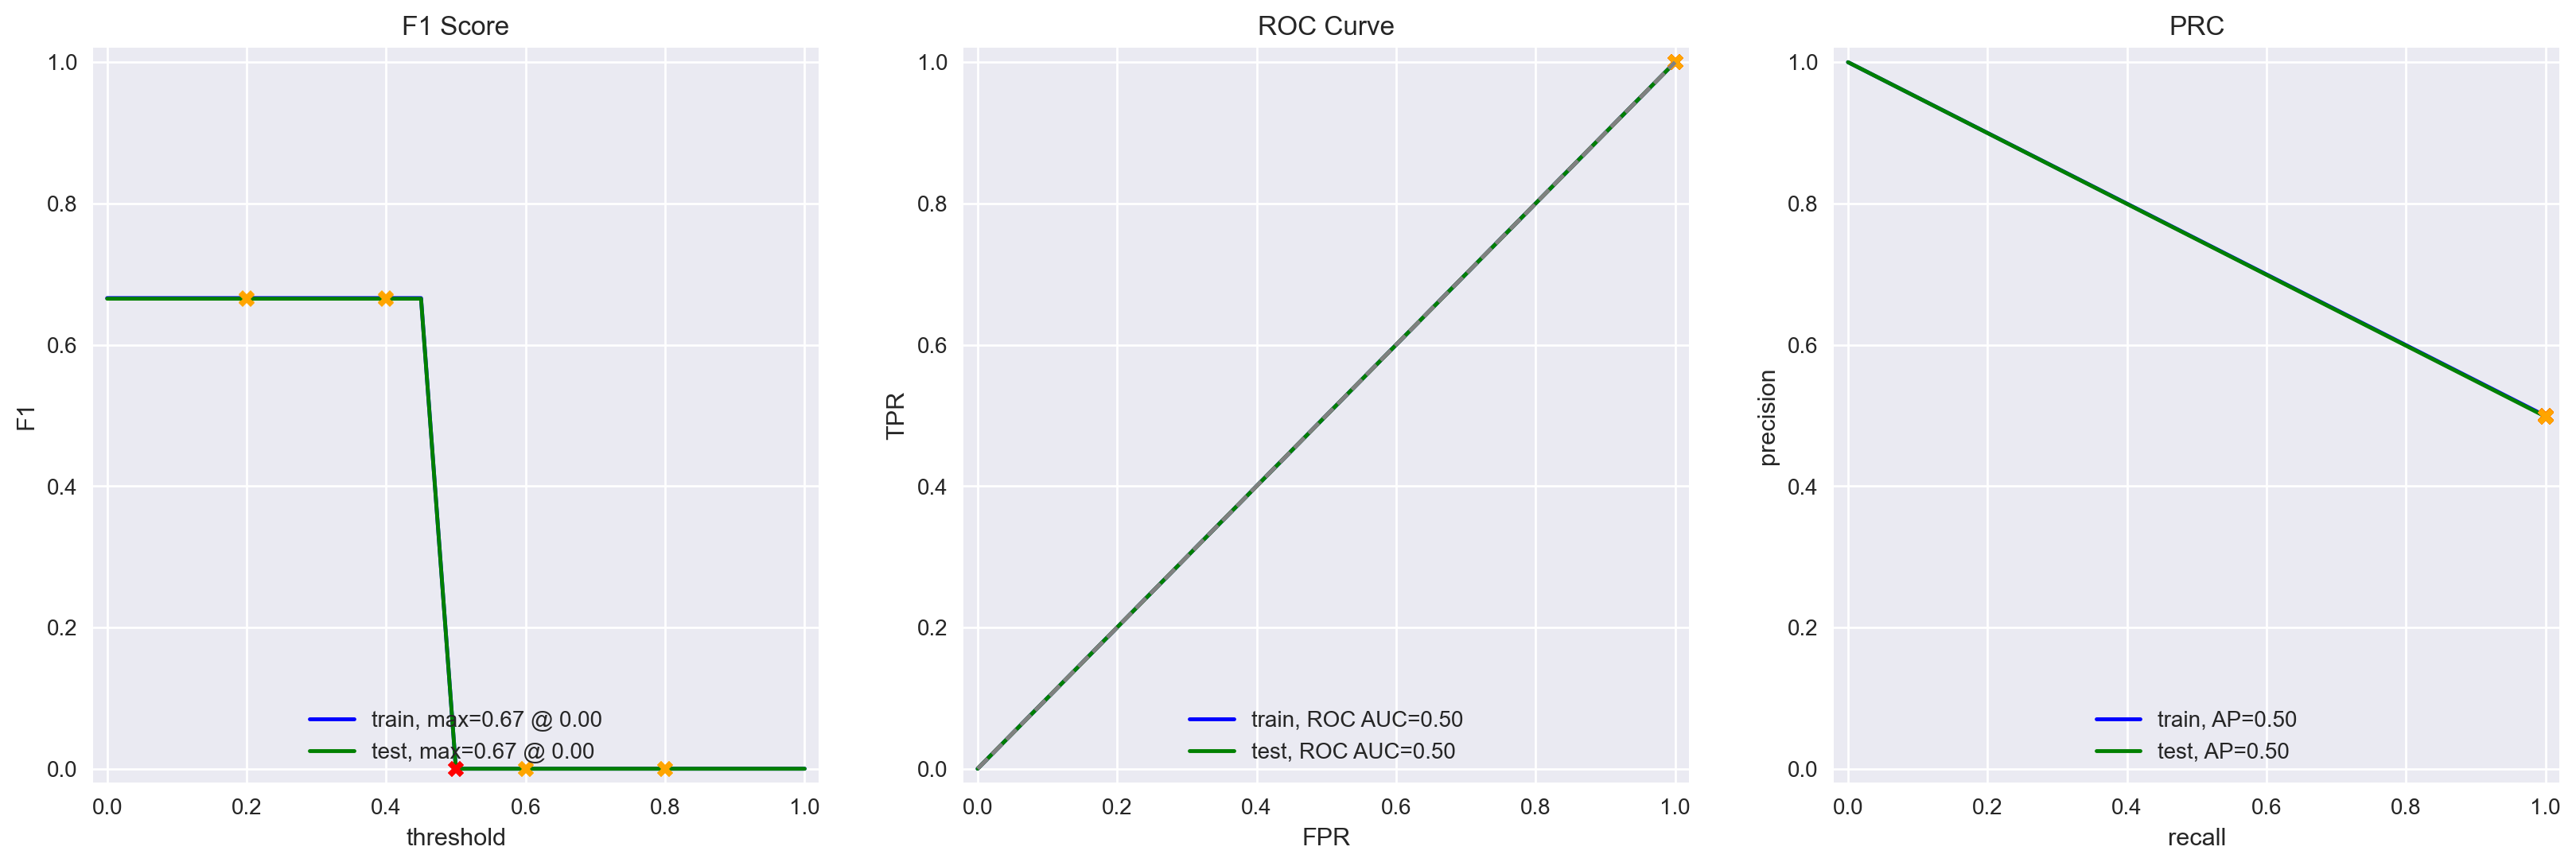

In [22]:
evaluate_model(model, f_train0, train_target, f_test0, test_target)

Skor F1 untuk set test adalah 0,0. Model selanjutnya perlu menghasilkan yang lebih baik.

### Model 1 - NLTK, TF-IDF dan LR <a name='test_1_2'></a>

**Step 4.2**
Melakukan pengujian dengan TF-IDF.

In [23]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

Mempersiapkan feature.

In [24]:
corpus_train=[]
corpus_test=[]

In [25]:
#Train corpus
for text in df_reviews_train['review_norm']:
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    l_join = " ".join(lemmas)
    corpus_train.append(l_join)

In [26]:
#Test corpus
for text in df_reviews_test['review_norm']:
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    l_join = " ".join(lemmas)
    corpus_test.append(l_join)

In [27]:
#Melakukan vektorisasi corpus dengan TF-IDF Vectorizer, menunjukkan stopwords dan unigram bahasa Inggris
count_tf_idf2=TfidfVectorizer(stop_words=stopwords.words('english'), lowercase=True, ngram_range=(1,1))
train_features_1 = count_tf_idf2.fit_transform(corpus_train)
test_features_1 = count_tf_idf2.transform(corpus_test)

Train model.

In [28]:
model_1 = LogisticRegression(C=0.5).fit(train_features_1, train_target)

Melakukan evaluasi model dengan menggunakan evaluasi rutin

          train  test
Accuracy   0.92  0.88
F1         0.92  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


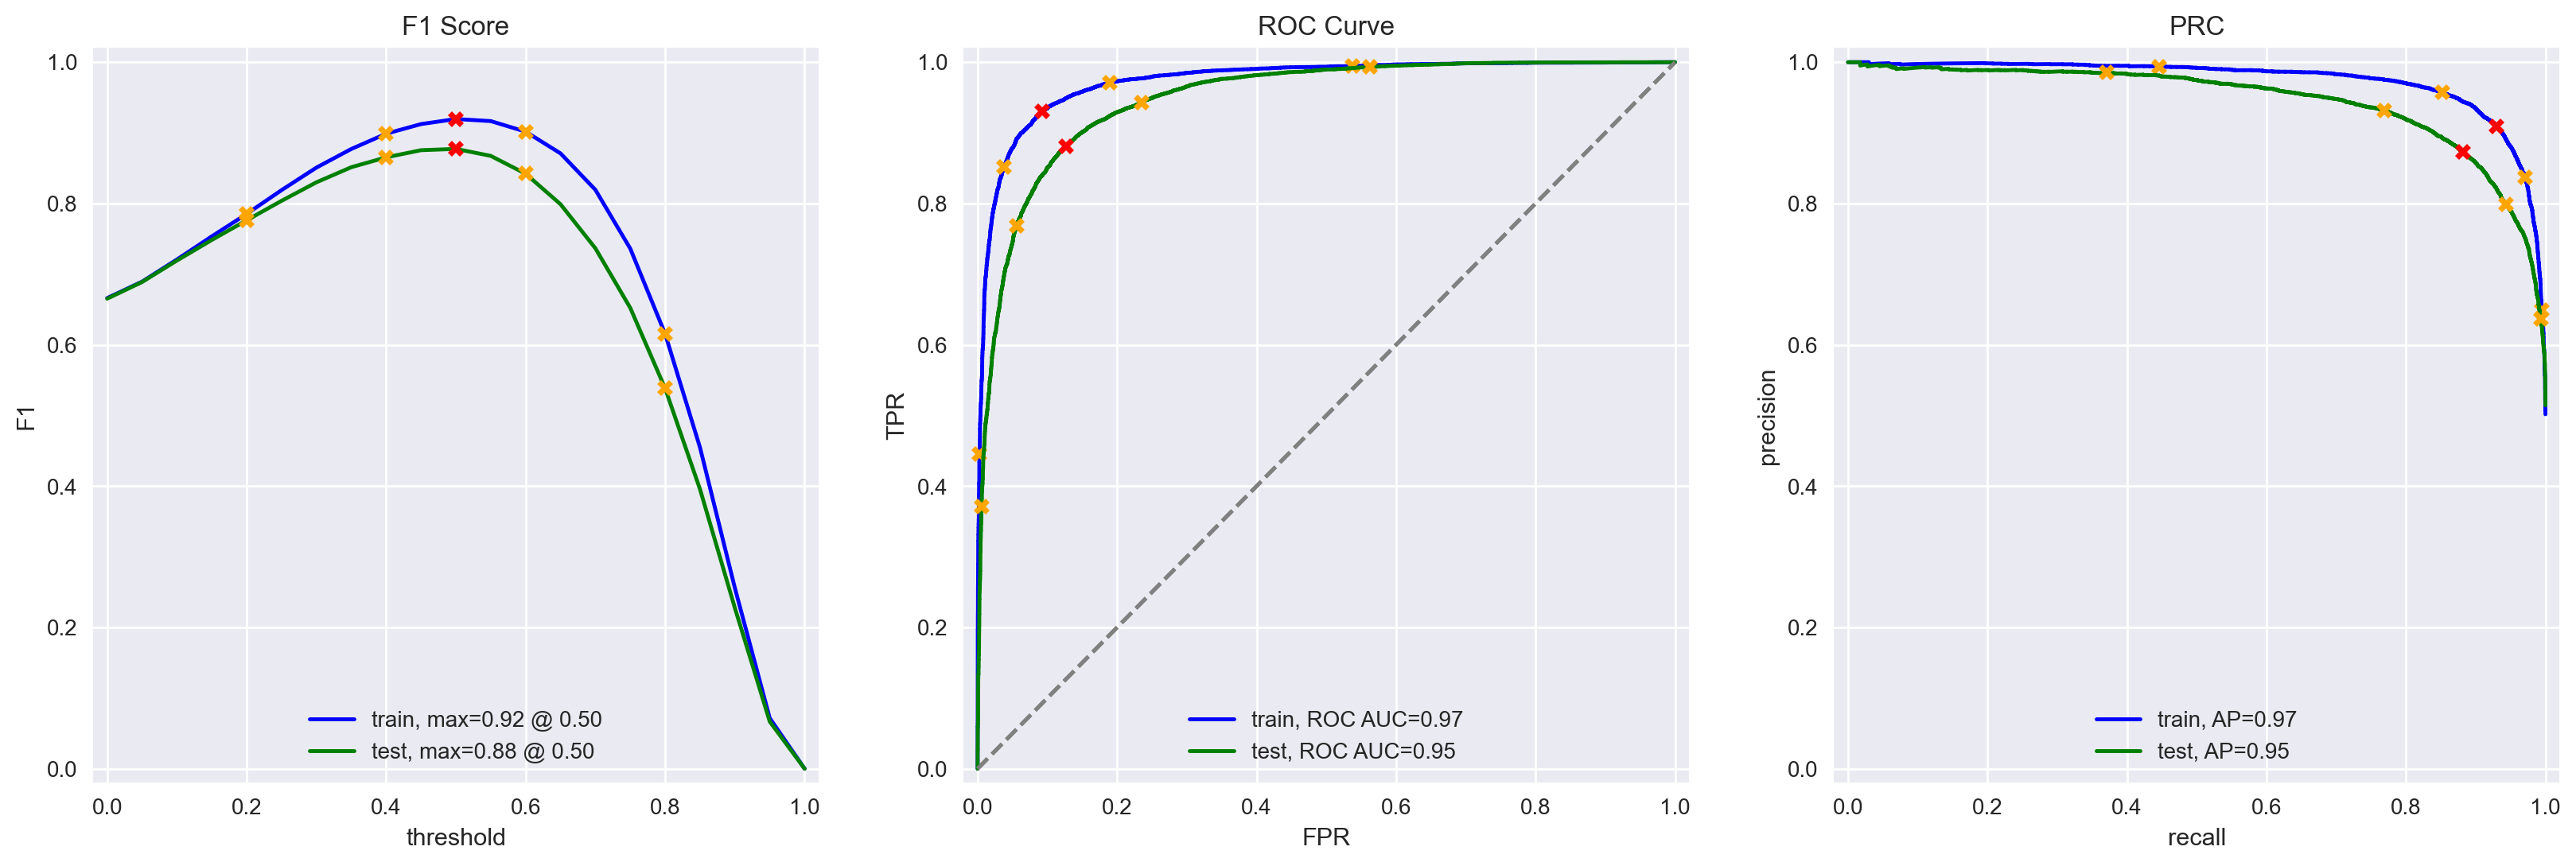

In [29]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

Skor F1 untuk set test adalah 0.88 yang mana lebih baik dari model sebelumnya dan berada di atas kebutuhan minimum 0,85.

### Model 3 - spaCy, TF-IDF and LR <a name='test_1_3'></a>

**Step 4.3**
Melakukan pengujian dengan spaCy.

In [30]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [31]:
#Fungsi yang memroses/membuat lemmatisasi text
def text_preprocessing_3(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    return ' '.join(tokens)

In [32]:
#Mendapatkan feature
c_train3=[]
c_test3=[]

#Train corpus
for text in df_reviews_train['review_norm']:
    result=text_preprocessing_3(text)
    c_train3.append(result)

#Test corpus
for text in df_reviews_test['review_norm']:
    result=text_preprocessing_3(text)
    c_test3.append(result)

#Melakukan vektorisasi corpus   
count_tf_idf3=TfidfVectorizer(stop_words=stopwords.words('english'), lowercase=True, ngram_range=(1,1))
f_train3 = count_tf_idf3.fit_transform(c_train3)
f_test3 = count_tf_idf3.transform(c_test3)

Train model.

In [33]:
model_3=LogisticRegression(C=0.5).fit(f_train3, train_target)

Evaluasi model.

          train  test
Accuracy   0.91  0.87
F1         0.91  0.87
APS        0.97  0.94
ROC AUC    0.97  0.94


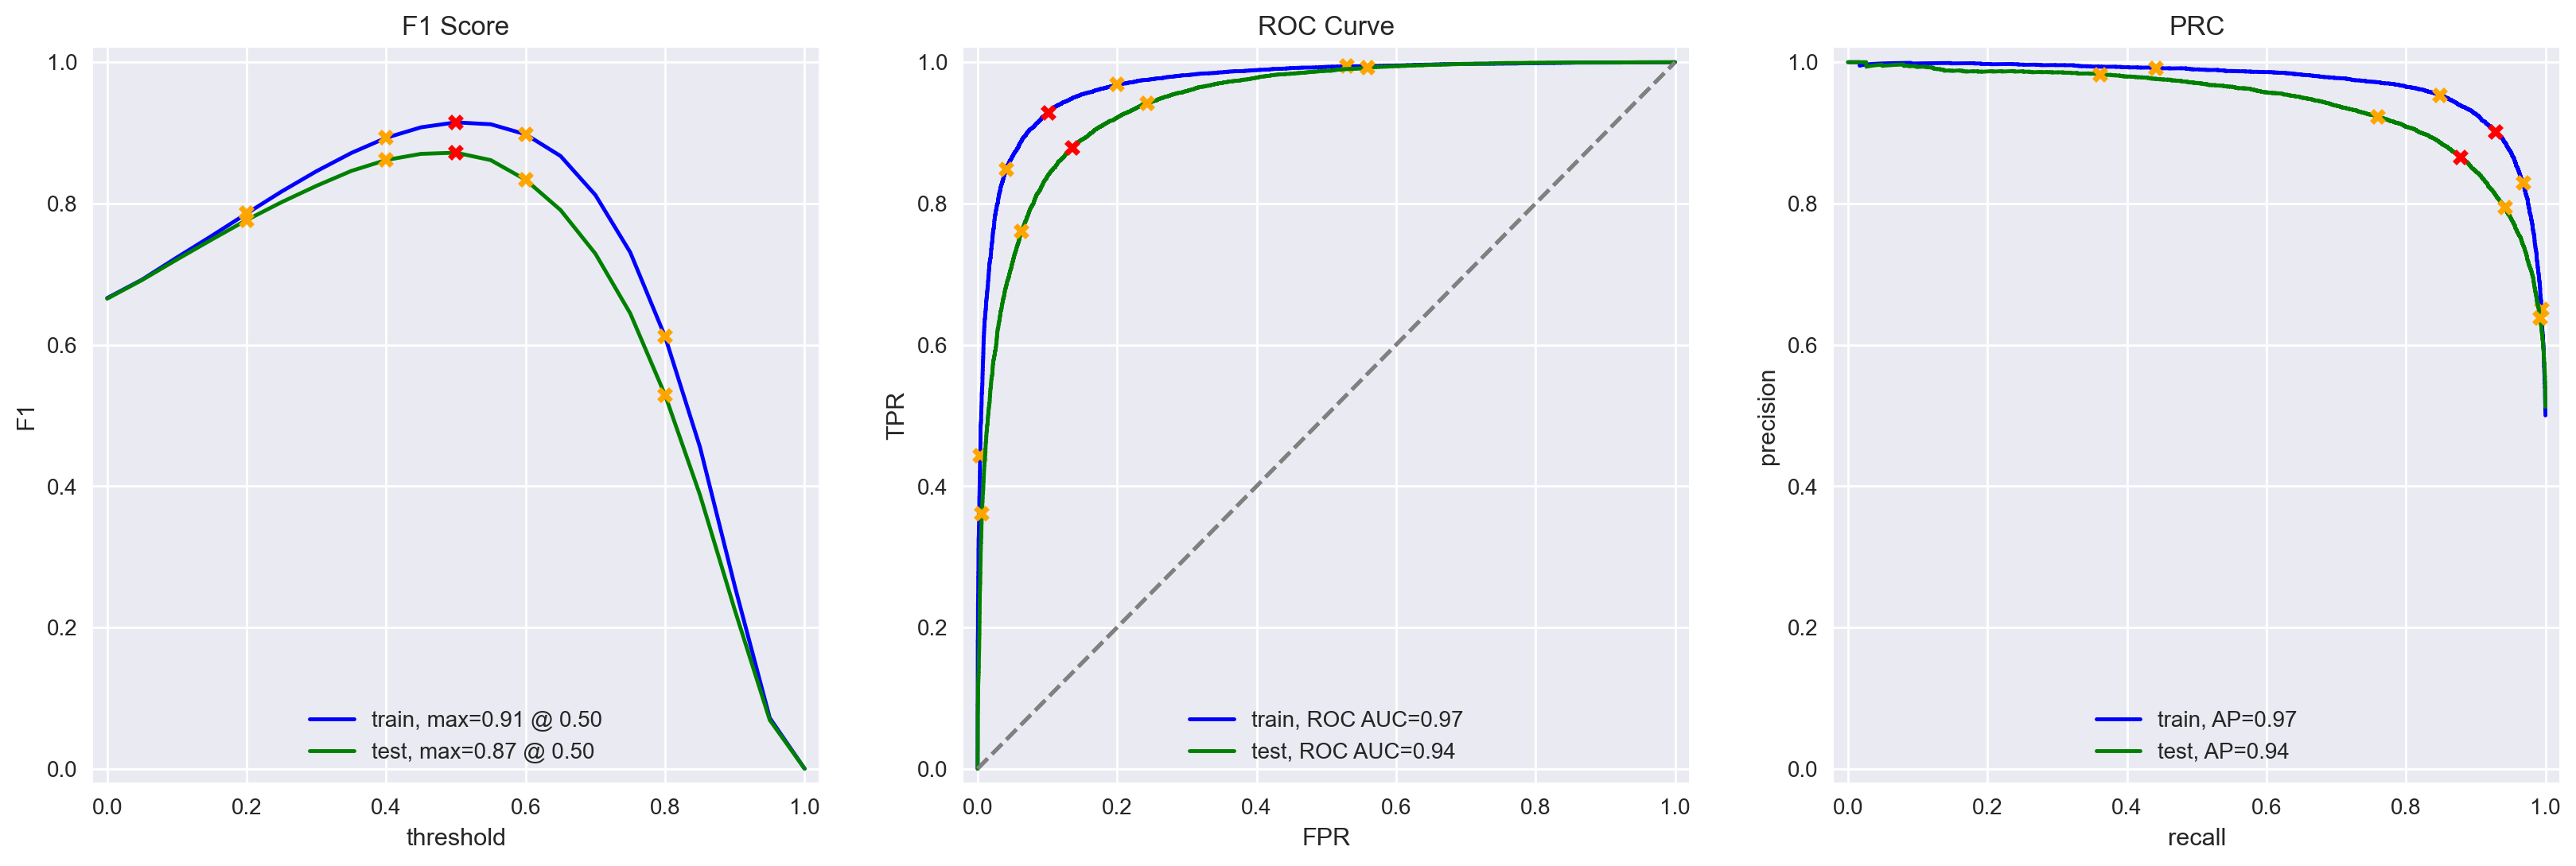

In [34]:
evaluate_model(model_3, f_train3, train_target, f_test3, test_target)

Skor F1 untuk set test adalah 0.87 yang mana sedikit lebih rendah dari model sebelumnya namun masih berada di atas kebutuhan minimum 0,85.

### Model 4 - spaCy, TF-IDF and LGBMClassifier <a name='test_1_4'></a>

**Step 4.4**
Melakukan pengujian dengan LightGBM Classifier.

Karena kita masih menggunakan spaCy dan TF-IDF, kita dapat menggunakan nilai vektor yang didapatkan dari model terakhir. Kita akan mencari parameter terbaik untuk melatih model LightGBM Classifier.

In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
#Mendapatkan parameter terbaik untuk model LightGBM Classifier
model=LGBMClassifier()
parameters={'num_leaves':[10, 20, 30],
            'learning_rate':[0.5, 0.1],
            'n_estimators':[10, 20],
            'objective':['binary'],
            'random_state':[12345]}
grid=GridSearchCV(estimator=model, param_grid=parameters, scoring='f1', cv=3, n_jobs=-1, verbose=0)
grid.fit(f_train3, train_target)
best_param=grid.best_params_

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.198877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430804
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353


In [37]:
print('Skor terbaik:', grid.best_score_)
print('Parameter terbaik:', best_param)

Skor terbaik: 0.83208332167947
Parameter terbaik: {'learning_rate': 0.5, 'n_estimators': 20, 'num_leaves': 30, 'objective': 'binary', 'random_state': 12345}


In [38]:
#train, test menggunakan parameter terbaik
model_4=LGBMClassifier(num_leaves=best_param['num_leaves'],
                      learning_rate=best_param['learning_rate'],
                      n_estimators=best_param['n_estimators'],
                      objective='binary',
                      random_state=12345)
model_4.fit(f_train3, train_target)

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.457386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430804
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353


LGBMClassifier(learning_rate=0.5, n_estimators=20, num_leaves=30,
               objective='binary', random_state=12345)

Evaluasi model.

          train  test
Accuracy   0.89  0.84
F1         0.89  0.84
APS        0.96  0.92
ROC AUC    0.96  0.92


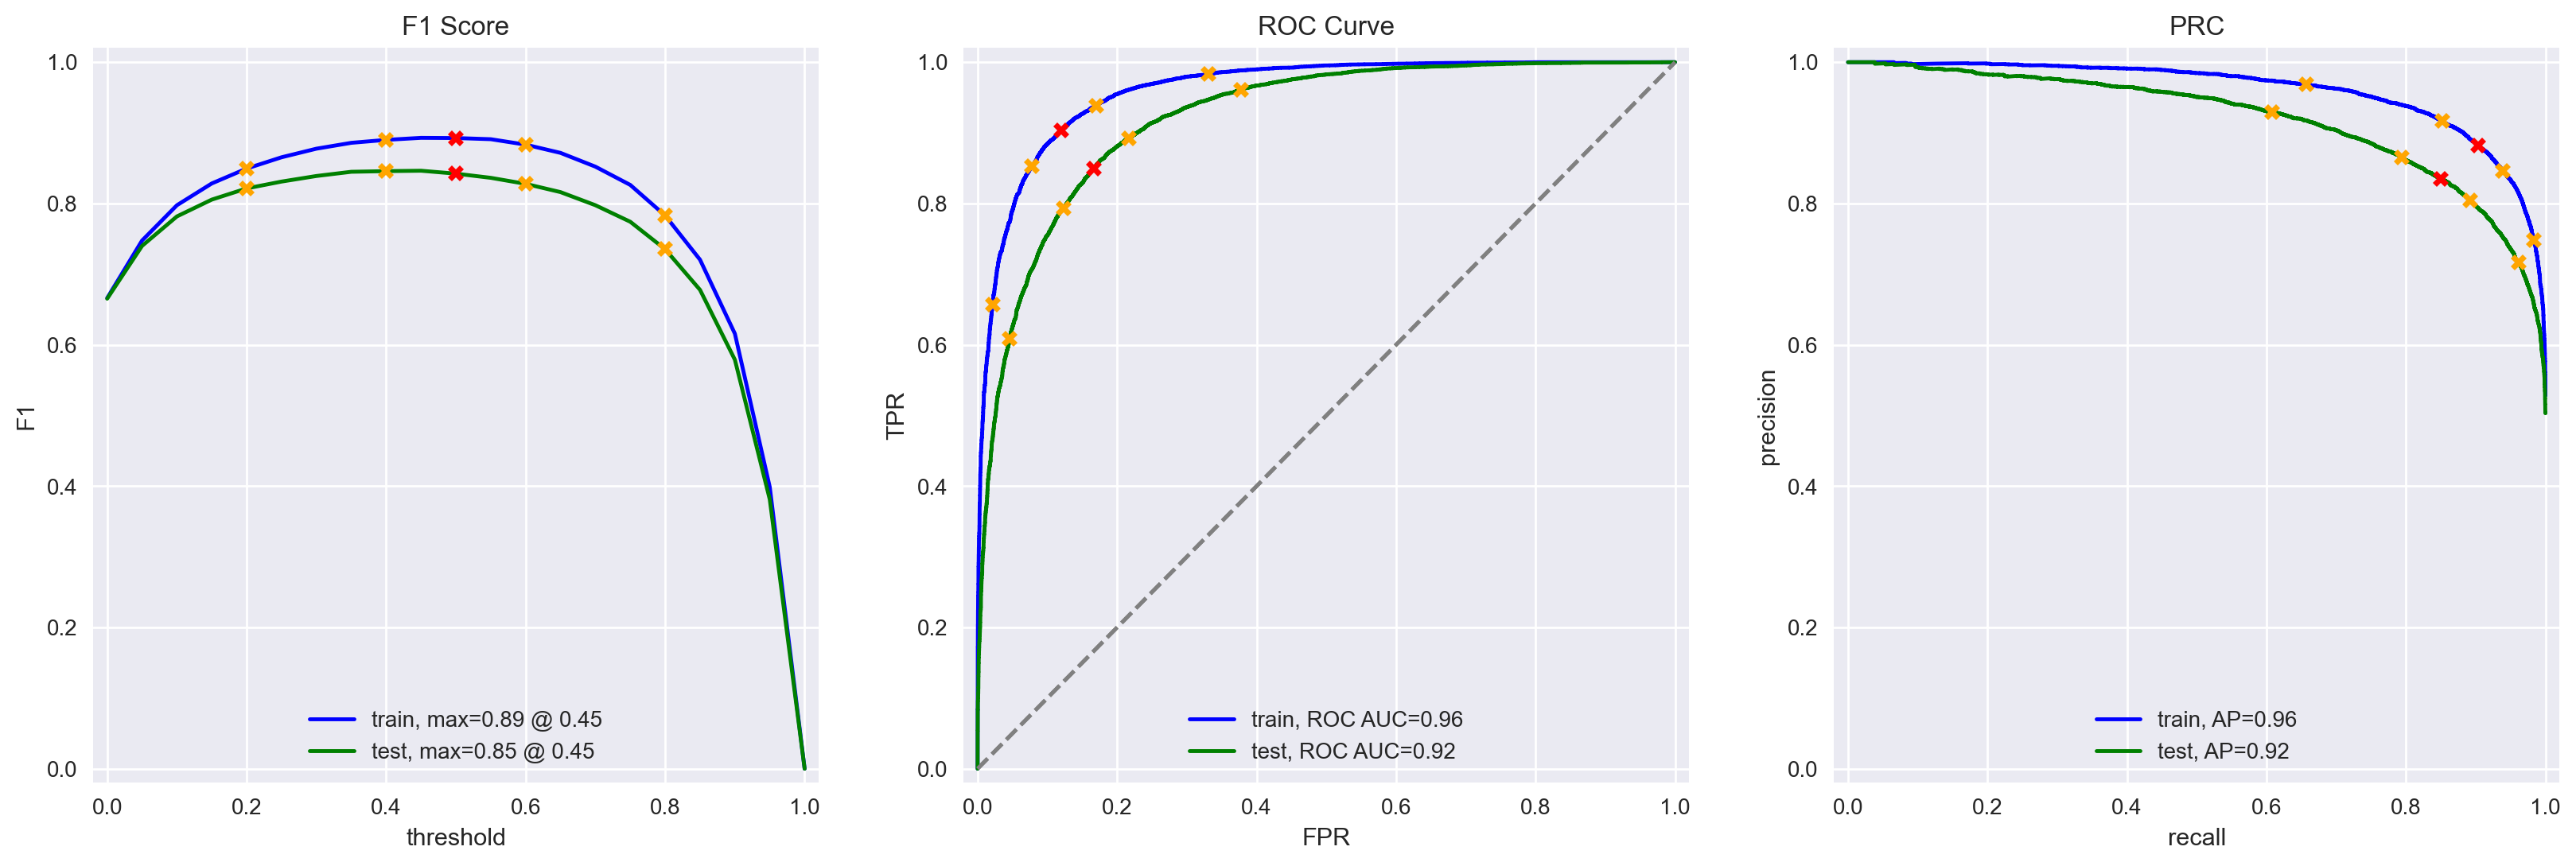

In [39]:
evaluate_model(model_4, f_train3, train_target, f_test3, test_target)

Skor F1 adalah 0,84 di mana sedikit lebih rendah dari kebutuhan minimum 0,85.

## Melakukan pengujian model-model pada my reviews <a name='test_2'></a>

**Step 4.5**
Melakukan pengujian pada my reviews.

### Model 1 <a name='test_2_1'></a>

In [40]:
#membuat dataframe dengan reviews untuk selanjutnya membuat kolom dengan normalized ### Model 2 <a name='test_2_2'></a>reviews

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x).lower())
my_reviews['review_norm'] = my_reviews['review_norm'].apply(lambda x: " ".join(word_tokenize(x)))

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


Review ke-1, ke-2, ke-4, dan k-7 adalah negatif, sedangkan review ke-3, ke-5, ke-6, dan ke-8 adalah positif.

### Model 2 <a name='test_2_2'></a>

In [41]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.19:  i did not simply like it not my kind of movie
0.28:  well i was bored and felt asleep in the middle of the movie
0.54:  i was really fascinated with the movie
0.20:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.42:  i didn t expect the reboot to be so good writers really cared about the source material
0.46:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.07:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.84:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model ini memberikan probabilitas positif yang lebih rendah untuk review ke-5 dan ke-6, yang mana positif.

### Model 3 <a name='test_2_3'></a>

In [42]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  i did not simply like it not my kind of movie
0.15:  well i was bored and felt asleep in the middle of the movie
0.50:  i was really fascinated with the movie
0.20:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.31:  i didn t expect the reboot to be so good writers really cared about the source material
0.38:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.07:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.85:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model ini lebih cenderung memberikan rating negatif daripada rating positif, karena model ini mendapatkan semua probabilitas review negatif dengan benar dan probabilitas review positif dengan salah kecuali untuk review terakhir.

### Model 4 <a name='test_2_4'></a>

In [43]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_4.predict_proba(count_tf_idf3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.53:  i did not simply like it not my kind of movie
0.29:  well i was bored and felt asleep in the middle of the movie
0.53:  i was really fascinated with the movie
0.31:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.66:  i didn t expect the reboot to be so good writers really cared about the source material
0.42:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.25:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.73:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


Model ini hanya mendapat 1 kemungkinan salah, yaitu review ke-1. Dan model ini tidak ekstrim seperti model lainnya. Probabilitas maksimal untuk yang di sini adalah 73%, dibandingkan dengan 85% dan 84% untuk yang lainnya.

# Temuan <a name='end'></a>

Kita telah menganalisis data dan melihat bahwa terdapat peningkatan jumlah film per tahun secara keseluruhan yang mencapai puncaknya pada tahun 2006, setelah itu kemudian menurun. Secara umum terlihat bahwa lebih sedikit film yang mendapatkan lebih banyak review dan lebih banyak review negatif per tahun dibandingkan review positif. Kita telah melatih model untuk memprediksi apakah suatu ulasan akan positif atau negatif. Model dengan skor F1 terbaik adalah model Logistic Regression yang menggunakan pemrosesan NLTK dan TF-IDF Vectorizer (skor F1 0,88). Kita tidak melatih model BERT karena tidak memiliki kekuatan pemrosesan yang cukup.

[Kembali ke Daftar Isi](#back)